**Small Image Classification Using Convolutional Neural Network (CNN)**

---


In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification
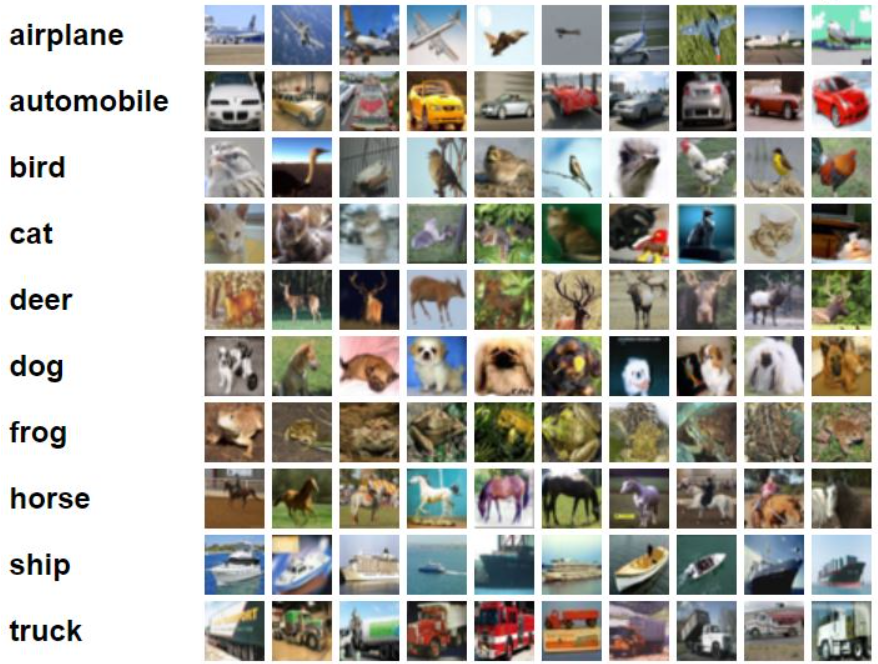

In [ ]:
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plotting Images to check

In [ ]:
def plot_sample(X, Y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

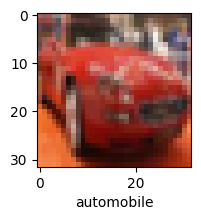

In [ ]:
plot_sample(X_train, Y_train, 5)

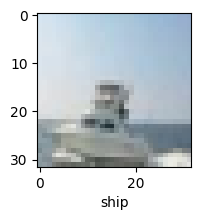

In [ ]:
plot_sample(X_train, Y_train, 100)

**Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255**

In [ ]:
# Normalizing the data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4810 - accuracy: 0.4685
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1202 - accuracy: 0.6085
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9866 - accuracy: 0.6580
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9057 - accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8406 - accuracy: 0.7094
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7875 - accuracy: 0.7275
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7444 - accuracy: 0.7405
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7001 - accuracy: 0.7570
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6649 - accuracy: 0.7682
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [ ]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9336 - accuracy: 0.6923


[0.9336081743240356, 0.692300021648407]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 14ms/step


array([[4.13555000e-03, 6.26994806e-05, 4.92453808e-03, 8.57945681e-01,
        1.36828283e-03, 8.64574388e-02, 1.85006037e-02, 1.32869303e-04,
        2.61383913e-02, 3.33924138e-04],
       [3.03751044e-02, 1.18171774e-01, 2.72580401e-05, 7.74817909e-06,
        3.27702355e-06, 4.01859026e-08, 1.44983829e-07, 2.96502691e-07,
        8.47333014e-01, 4.08121478e-03],
       [1.36410370e-01, 5.13220310e-01, 4.24403092e-03, 1.75685785e-03,
        6.41578576e-03, 1.78705246e-04, 8.98631813e-04, 2.04360369e-03,
        3.20751995e-01, 1.40797542e-02],
       [9.07138765e-01, 1.15190586e-03, 1.33008957e-02, 4.27443068e-04,
        1.14955963e-03, 4.64061122e-06, 2.12321087e-04, 5.10132195e-05,
        7.65471905e-02, 1.63530622e-05],
       [4.91431774e-06, 3.48675603e-05, 4.95643765e-02, 9.13932361e-03,
        5.19638181e-01, 5.90657000e-04, 4.20947284e-01, 1.26142795e-05,
        1.56793194e-05, 5.21576439e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [ ]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

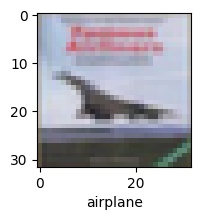

In [ ]:
plot_sample(X_test, Y_test, 3)

In [ ]:
classes[y_classes[3]]

'airplane'

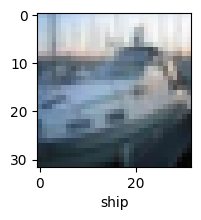

In [ ]:
plot_sample(X_test, Y_test, 2)

In [ ]:
classes[y_classes[2]]

'automobile'